In [1]:
using Pkg
Pkg.add("Plots")
Pkg.add("Distributions")
Pkg.add("QuadGK")
Pkg.add("SpecialFunctions")
Pkg.add("Optim")
Pkg.add("Printf")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add(PackageSpec(url="https://github.com/JuliaReliab/Origin.jl.git"))
Pkg.add(PackageSpec(url="https://github.com/JuliaReliab/Deformula.jl.git"))
Pkg.add(PackageSpec(url="https://github.com/JuliaReliab/SparseMatrix.jl.git"))
Pkg.add(PackageSpec(url="https://github.com/JuliaReliab/NMarkov.jl.git"))

   Updating registry at `/opt/julia/registries/General`
######################################################################### 100.0%                76.1%
  Resolving package versions...
  Installed MbedTLS_jll ────────────────── v2.16.8+1
  Installed Adapt ──────────────────────── v2.3.0
  Installed Measures ───────────────────── v0.3.1
  Installed HDF5_jll ───────────────────── v1.10.5+7
  Installed EarCut_jll ─────────────────── v2.1.5+1
  Installed FreeType2_jll ──────────────── v2.10.1+5
  Installed DataValueInterfaces ────────── v1.0.0
  Installed Plots ──────────────────────── v1.8.1
  Installed Xorg_libXau_jll ────────────── v1.0.9+4
  Installed Ogg_jll ────────────────────── v1.3.4+2
  Installed Xorg_libXi_jll ─────────────── v1.7.10+4
  Installed Xorg_libxcb_jll ────────────── v1.13.0+3
  Installed Missings ───────────────────── v0.4.4
  Installed JpegTurbo_jll ──────────────── v2.0.1+3
  Installed Requires ───────────────────── v1.1.0
  Installed Opus_jll ────────────────

    Cloning git-repo `https://github.com/JuliaReliab/Origin.jl.git`


g: [========================================>]  100.0 %

   Updating git-repo `https://github.com/JuliaReliab/Origin.jl.git`


  Resolving package versions...


Updating `/opt/julia/environments/v1.5/Project.toml`
  [421443cc] + Origin v0.1.2 `https://github.com/JuliaReliab/Origin.jl.git#master`
Updating `/opt/julia/environments/v1.5/Manifest.toml`
  [421443cc] + Origin v0.1.2 `https://github.com/JuliaReliab/Origin.jl.git#master`
    Cloning git-repo `https://github.com/JuliaReliab/Deformula.jl.git`


g: [========================================>]  100.0 %

   Updating git-repo `https://github.com/JuliaReliab/Deformula.jl.git`


  Resolving package versions...


Updating `/opt/julia/environments/v1.5/Project.toml`
  [92955551] + Deformula v0.1.3 `https://github.com/JuliaReliab/Deformula.jl.git#master`
Updating `/opt/julia/environments/v1.5/Manifest.toml`
  [92955551] + Deformula v0.1.3 `https://github.com/JuliaReliab/Deformula.jl.git#master`
    Cloning git-repo `https://github.com/JuliaReliab/SparseMatrix.jl.git`


g: [========================================>]  100.0 %

   Updating git-repo `https://github.com/JuliaReliab/SparseMatrix.jl.git`


  Resolving package versions...


Updating `/opt/julia/environments/v1.5/Project.toml`
  [b2a93422] + SparseMatrix v0.2.1 `https://github.com/JuliaReliab/SparseMatrix.jl.git#master`
Updating `/opt/julia/environments/v1.5/Manifest.toml`
  [b2a93422] + SparseMatrix v0.2.1 `https://github.com/JuliaReliab/SparseMatrix.jl.git#master`
    Cloning git-repo `https://github.com/JuliaReliab/NMarkov.jl.git`


g: [========================================>]  100.0 %]  96.4 %.8 %

   Updating git-repo `https://github.com/JuliaReliab/NMarkov.jl.git`


  Resolving package versions...
Updating `/opt/julia/environments/v1.5/Project.toml`
  [c5cca998] + NMarkov v0.3.2 `https://github.com/JuliaReliab/NMarkov.jl.git#master`
Updating `/opt/julia/environments/v1.5/Manifest.toml`
  [c5cca998] + NMarkov v0.3.2 `https://github.com/JuliaReliab/NMarkov.jl.git#master`


In [15]:
using SparseArrays
using NMarkov
using Plots
using Distributions
using QuadGK
using SpecialFunctions
using Optim
using Printf
using DataFrames
using CSV
using SparseMatrix

In [3]:
import NMarkov.eye
function eye(M::AbstractMatrix)
    eye(size(M)[1])
end

eye (generic function with 3 methods)

# Dekker and Dijkstra

In [4]:
function PProb(t0, D0, D1, dist)
    Q = D0 + D1
    I = eye(D0)
    p1 = mexpmix(Q, I; bounds = (0.0, t0), rmax = 10000) do t
        pdf(dist, t)
    end
    p2 = mexp(Q, I, t0, rmax = 10000)
    p3 = mexpmix(D0, I; bounds = (0.0, Inf64), rmax = 10000) do t
        pdf(dist, t+t0)
    end
    _, p4 = mexpcmix(D0, I; bounds = (0.0, Inf64), rmax = 10000) do t
        pdf(dist, t+t0)
    end
    gth(p1 + p2 * (p3 + p4*D1))
end

PProb (generic function with 1 method)

In [5]:
function g(t, t0, pss, D0, D1)
    Q = D0 + D1
    tmp = exp(Q*t0)' * pss
    y = exp(D0*t)' * tmp
    sum(D1' * y)
end

g (generic function with 1 method)

In [6]:
function T(t0, dist)
    res = quadgk(x -> ccdf(dist, x), 0, t0, rtol=1e-8)
    res[1]
end

T (generic function with 1 method)

In [7]:
function C(t0, dist, cp, cf)
    cp + (cf - cp)*cdf(dist, t0)
end

C (generic function with 1 method)

In [8]:
# standard age replacement
As(t0, dist, cp, cf) = C(t0, dist, cp, cf) / T(t0, dist)

As (generic function with 1 method)

In [9]:
# opportunity
function Aop(t0, dist, cp, cf, D0, D1)
    pss = PProb(t0, D0, D1, dist)
    res1 = quadgk(x -> T(t0 + x, dist) * g(x, t0, pss, D0, D1), 0, Inf, rtol=1e-8)
    res2 = quadgk(x -> C(t0 + x, dist, cp, cf) * g(x, t0, pss, D0, D1), 0, Inf, rtol=1e-8)
    res2[1] / res1[1]
end

Aop (generic function with 1 method)

In [10]:
function failure_param(;mttf, cv)
    m = optimize(m -> (gamma(1+2/m)/gamma(1+1/m)^2 - 1.0 - cv^2)^2, 0.0001, 10.0).minimizer
    eta = mttf / gamma(1+1/m)
    dist = Weibull(m, eta)

    println("failure shape parameter ", m)
    println("failure scale parameter ", eta)
    println("failure mttf ", mttf)
    println("failure cv ", cv)
    return dist
end

failure_param (generic function with 1 method)

In [11]:
function poisson_param(;mttop)
    # poisson
    D0 = Float64[-2 1; 1 -2]
    D1 = Float64[1 0; 0 1]

    ss = gth(Matrix(D0+D1))
    tmp = (-D0)' \ ss
    mo = sum(tmp)

    # scale
    D0 = D0 .* mo ./ mttop
    D1 = D1 .* mo ./ mttop

    ss = gth(Matrix(D0+D1))
    tmp = (-D0)' \ ss
    mo = sum(tmp)
    tmp = (-D0)' \ tmp
    mo2 = 2*sum(tmp)

    println("mean opportunity interval ", mo)
    println("cv for opportunity interval ", sqrt(mo2 - mo^2)/mo)
    return D0, D1, 1.0
end

function hyporenewal_param(;mttop, b)
    # hypo renewal
#     b = Float64[1, 1]
    D0 = Float64[-b[1] b[1]; 0 -b[2]]
    D1 = Float64[0 0; b[2] 0]

    ss = gth(Matrix(D0+D1))
    tmp = (-D0)' \ ss
    mo = sum(tmp)

    # scale
    D0 = D0 .* mo ./ mttop
    D1 = D1 .* mo ./ mttop

    ss = gth(Matrix(D0+D1))
    tmp = (-D0)' \ ss
    mo = sum(tmp)
    tmp = (-D0)' \ tmp
    mo2 = 2*sum(tmp)
    cv = sqrt(mo2 - mo^2)/mo
    println("mean opportunity interval ", mo)
    println("cv for opportunity interval ", cv)
    return D0, D1, cv
end

function hyperrenewal_param(;mttop, u, b)
    # hyper exp
    D0 = Float64[-b[1] 0; 0 -b[2]]
    D1 = reshape(b, 2, 1) * reshape(u, 1, 2)

    ss = gth(Matrix(D0+D1))
    tmp = (-D0)' \ ss
    mo = sum(tmp)

    # scale
    D0 = D0 .* mo ./ mttop
    D1 = D1 .* mo ./ mttop

    ss = gth(Matrix(D0+D1))
    tmp = (-D0)' \ ss
    mo = sum(tmp)
    tmp = (-D0)' \ tmp
    mo2 = 2*sum(tmp)
    cv = sqrt(mo2 - mo^2)/mo
    println("mean opportunity interval ", mo)
    println("cv for opportunity interval ", cv)
    return D0, D1, cv

end

function mmpp_param(;mttop, u, b)
    # mmpp
    D0 = Float64[-(u[1]+b[1]) u[1]; u[2] -(u[2]+b[2])]
    D1 = Float64[b[1] 0; 0 b[2]]

    ss = gth(Matrix(D0+D1))
    tmp = (-D0)' \ ss
    mo = sum(tmp)

    # scale
    D0 = D0 .* mo ./ mttop
    D1 = D1 .* mo ./ mttop

    ss = gth(Matrix(D0+D1))
    tmp = (-D0)' \ ss
    mo = sum(tmp)
    tmp = (-D0)' \ tmp
    mo2 = 2*sum(tmp)

    cv = sqrt(mo2 - mo^2)/mo
    println("mean opportunity interval ", mo)
    println("cv for opportunity interval ", cv)
    return D0, D1, cv
end

mmpp_param (generic function with 1 method)

In [12]:
cp, cf = 1.0, 10.0
dist = failure_param(mttf = 10.0, cv = 0.1)
D0, D1 = poisson_param(mttop = 1.0)

ts = LinRange(1, 20.0, 100)
value = [As(t0, dist, cp, cf) for t0 = ts]
value1 = [Aop(t0, dist, cp, cf, D0, D1) for t0 = ts];

failure shape parameter 9.999999703209413
failure scale parameter 10.511370074337558
failure mttf 10.0
failure cv 0.1
mean opportunity interval 1.0
cv for opportunity interval 1.0


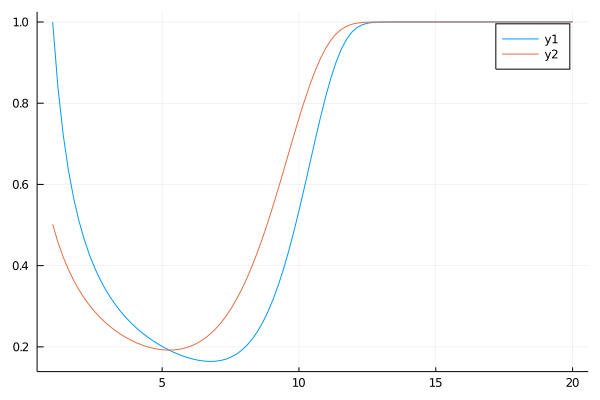

In [13]:
plot(ts, value)
plot!(ts, value1)

In [14]:
cp = 1.0
cf = 10.0
mttf = 10.0
result = []
for cv in [0.1, 0.5, 0.8]
    mttop = 0
    ocv = 0
    dist = failure_param(mttf = mttf, cv = cv)
    result0 = optimize(t0 -> As(t0, dist, cp, cf), 1, mttf*2)
    push!(result, ("st", cv, mttop, ocv, result0.minimizer, result0.minimum, result0.converged))
    for mttop in [0.1, 1.0, 2.0, 5.0, 10.0]
        D0, D1, ocv = poisson_param(mttop = mttop)
        result1 = optimize(t0 -> Aop(t0, dist, cp, cf, D0, D1), 1, mttf*2)
        push!(result, ("poi", cv, mttop, ocv, result1.minimizer, result1.minimum, result1.converged))
        for b in [[1, 5], [1, 2], [1, 1]]
            D0, D1, ocv = hyporenewal_param(mttop = mttop, b=b)
            result1 = optimize(t0 -> Aop(t0, dist, cp, cf, D0, D1), 1, mttf*2)
            push!(result, ("hypo", cv, mttop, ocv, result1.minimizer, result1.minimum, result1.converged))
        end
        b = [10, 1]
        for u in [[0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
            D0, D1, ocv = hyperrenewal_param(mttop = mttop, u=u, b=b)
            result1 = optimize(t0 -> Aop(t0, dist, cp, cf, D0, D1), 1, mttf*2)
            push!(result, ("hyper", cv, mttop, ocv, result1.minimizer, result1.minimum, result1.converged))
        end
        u = [1, 1]
        for b in [[1, 2], [1, 5], [1, 10]]
            D0, D1, ocv = mmpp_param(mttop = mttop, u=u, b=b)
            result1 = optimize(t0 -> Aop(t0, dist, cp, cf, D0, D1), 1, mttf*2)
            push!(result, ("mmpp", cv, mttop, ocv, result1.minimizer, result1.minimum, result1.converged))
        end
    end
end
result = DataFrame(result)
@show result
result |> CSV.write("all.csv", delim=',', header=false)

failure shape parameter 9.999999703209413
failure scale parameter 10.511370074337558
failure mttf 10.0
failure cv 0.1
mean opportunity interval 0.1
cv for opportunity interval 1.0
mean opportunity interval 0.1
cv for opportunity interval 0.9736379530830043
mean opportunity interval 0.1
cv for opportunity interval 0.9147320339189785
mean opportunity interval 0.1
cv for opportunity interval 0.8819171036881968
mean opportunity interval 0.1
cv for opportunity interval 1.0199501246882792
mean opportunity interval 0.10000000000000002
cv for opportunity interval 1.0764794285093986
mean opportunity interval 0.1
cv for opportunity interval 1.2645601709825842
mean opportunity interval 0.10000000000000002
cv for opportunity interval 1.020204061220407
mean opportunity interval 0.1
cv for opportunity interval 1.1489125293076057
mean opportunity interval 0.10000000000000002
cv for opportunity interval 1.3114877048604001
mean opportunity interval 1.0
cv for opportunity interval 1.0
mean opportunity i

"all.csv"